### **INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [3]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [4]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastbook import *                              # Getting all the Libraries. 
from fastai.callback.fp16 import *
from fastai.text.all import *                       # Getting all the Libraries.
from fastai.vision.all import *                     # Getting all the Libraries. 

**GETTING THE DATASET:**
- I will get the **IMDB Dataset** here.

In [6]:
#@ GETTING THE DATASET: 
path = untar_data(URLs.IMDB)                       # Getting Path to the Dataset. 
path.ls()                                          # Inspecting the Path.

(#7) [Path('/root/.fastai/data/imdb/tmp_clas'),Path('/root/.fastai/data/imdb/imdb.vocab'),Path('/root/.fastai/data/imdb/README'),Path('/root/.fastai/data/imdb/unsup'),Path('/root/.fastai/data/imdb/train'),Path('/root/.fastai/data/imdb/test'),Path('/root/.fastai/data/imdb/tmp_lm')]

### **IMDB DATASET: NATURAL LANGUAGE PROCESSING**

**DATABLOCK AND DATALOADERS:**

In [7]:
#@ CREATING THE DATALOADERS: IMDB FORMAT DATASET: 
dls = TextDataLoaders.from_folder(path, valid="test")                       # Initializing DataLoaders. 

In [8]:
#@ CREATING THE DATALOADERS: 
path = untar_data(URLs.IMDB)                                                # Path to the Dataset. 
dls = DataBlock(blocks=(TextBlock.from_folder(path), CategoryBlock),        # Initializing Text Block. 
                get_y=parent_label,                                         # Getting Labels. 
                get_items=partial(get_text_files,folders=["train","test"]), # Getting Text Files. 
                splitter=GrandparentSplitter(valid_name="test")             # Splitting the Data. 
                ).dataloaders(path)                                         # Initializing Data Loaders. 

**TRANSFORMS:**

In [9]:
#@ GETTING THE TEXT DATA: 
files = get_text_files(path, folders=["train", "test"])                     # Getting Text Files. 
txts = L(o.open().read() for o in files[:2000])                             # Getting List of Texts. 

In [10]:
#@ INITIALIZING TOKENIZATION: 
tok = Tokenizer.from_folder(path)                                           # Initializing Tokenizer. 
tok.setup(txts)                                                             # Getting Tokens. 
toks = txts.map(tok)                                                        # Getting Tokens. 
toks[0]                                                                     # Inspecting Tokens. 

(#435) ['xxbos','xxmaj','five','years','after','the','original','xxmaj','creepshow',','...]

In [11]:
#@ INITIALIZING NUMERICALIZATION: 
num = Numericalize()                                                        # Initializing Numericalizer. 
num.setup(toks)
nums = toks.map(num)                                                        # Numericalization. 
nums[0][:10]                                                                # Inspection. 

TensorText([   2,    8,  604,  213,  119,    9,  219,    8, 5063,   11])

In [12]:
#@ CONVERTING INTEGERS INTO STRING TOKENS: 
nums_dec = num.decode(nums[0][:20]); nums_dec                               # Decoding Integers. 

(#20) ['xxbos','xxmaj','five','years','after','the','original','xxmaj','creepshow',','...]

In [13]:
#@ GETTING TOKENS: 
tok.decode(nums_dec)

'xxbos xxmaj five years after the original xxmaj creepshow , another inferior horror sequel is xxunk by xxmaj george xxup'

In [14]:
#@ IMPLEMENTATION OF TRANSFORMS: TOKENIZATION IN TUPLES: 
tok((txts[0], txts[1]))                                                     # Implemetation of Tokenization. 

((#435) ['xxbos','xxmaj','five','years','after','the','original','xxmaj','creepshow',','...],
 (#447) ['xxbos','xxmaj','it','is','not','obvious','from','viewing','this','film'...])

**CUSTOM TRANSFORM FUNCTION:**

In [15]:
#@ WRITING CUSTOM TRANSFORM FUNCTION: 
def f(x:int): return x + 1                                 # Defining Function. 
tfm = Transform(f)                                         # Initializing a Transform. 
tfm(2.0), tfm(2)                                           # Inspection. 

(2.0, 3)

**DECORATOR:**
- Python has a special syntax for passing a function to another function or something that behaves like a function which is also known as callable in **Python** is called a **Decorator**. A **Decorator** is used by prepending a callable with @ and placing it before the function definition. 

In [16]:
#@ WRITING CUSTOM TRANSFORM FUNCTION WITH DECORATORS: 
@Transform
def f(x:int): return x + 1                                 # Defining Function. 
tfm(2.0), tfm(2)                                           # Inspection. 

(2.0, 3)

In [17]:
#@ WRITING CUSTOM TRANSFORM FUNCTION WITH SETUP AND DECODE: 
class NormalizeMean(Transform):                            # Initializing Transform Subclass. 
    def setups(self, items):                               # Defining Setup Function. 
        self.mean = sum(items) / len(items)                # Getting Mean of Items. 
    def encodes(self, x): return x - self.mean             # Defining Encode Function. 
    def decodes(self, x): return x + self.mean             # Defining Decode Function. 

#@ IMPLEMENTATION OF NORMALIZE MEAN CLASS: 
tfm = NormalizeMean()                                      # Initializing Class. 
tfm.setup([1, 2, 3, 4, 5])                                 # Initializing Object. 
start = 2
y = tfm(start)                                             # Implementation of Class. 
z = tfm.decode(y)                                          # Implementation of Decode Function. 
tfm.mean, y, z                                             # Inspection. 

(3.0, -1.0, 2.0)

**PIPELINE**
- **Pipeline** class helps to compose several **Transforms** together. 

In [18]:
#@ INITIALIZING PIPELINE CLASS: 
tfms = Pipeline([tok, num])                               # Initializing Tokenizer and Numericalization. 
t = tfms(txts[0]); t[:20]                                 # Implementation of Pipeline Class. 

TensorText([   2,    8,  604,  213,  119,    9,  219,    8, 5063,   11,  180, 3427,  182,  640,   16,    0,   54,    8, 1069,    7])

In [19]:
#@ IMPLEMENTATION OF PIPELINE CLASS: 
tfms.decode(t)[:100]                                      # Initializing Decoder. 

'xxbos xxmaj five years after the original xxmaj creepshow , another inferior horror sequel is xxunk '

**TRANSFORMED COLLECTIONS:**

In [20]:
#@ IMPLEMENTATION OF TRANSFORMED LISTS: MULTIPLE TRANSFORMS: 
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize])      # Implementation of Transformed Lists. 
t = tls[0]; t[:20]                                                       # Inspection. 
tls.decode(t)[:100]                                                      # Initializing Decoding. 

'xxbos xxmaj five years after the original xxmaj creepshow , another inferior horror sequel is penned'

In [21]:
#@ INSPECTING THE DECODED INFORMATION: 
tls.show(t)

xxbos xxmaj five years after the original xxmaj creepshow , another inferior horror sequel is penned by xxmaj george xxup a. xxmaj romero and xxmaj stephen xxmaj king : xxmaj creepshow 2 . xxmaj this time there are only three stories instead of five . xxmaj none of the three stories is really original or distinguished either . xxmaj the first story is a horror staple , formulaic story about a wooden xxmaj indian statue seeking revenge against the killers of its owners . xxmaj the effects are really neat in this story , but it 's just too familiar to be compelling enough . xxmaj george xxmaj kennedy and xxmaj dorothy xxmaj lamour play the elderly store owners . xxmaj the second story , " the xxmaj raft " , is a xxmaj stephen xxmaj king story . xxmaj it 's about four teenagers that unwittingly spend the day on a wooden pallet in the middle of an isolated lake . xxmaj soon the kids are screaming for their lives as a watery blob does each of them in for no apparent reason . xxmaj however ,

In [22]:
#@ CREATING TRAINING AND VALIDATION SET: 
cut = int(len(files)*0.8)                                                # Getting Ratios.
splits = [list(range(cut)), list(range(cut, len(files)))]                # Getting Splitting Ranges. 
tls = TfmdLists(files, [Tokenizer.from_folder(path), Numericalize], 
                splits=splits)                                           # Transformed Lists with Splits. 
tls.valid[0][:20]                                                        # Inspecting Transformed Data. 

TensorText([   2,    8,   27,   16, 3033,    9,  437,   69,    8, 6308,   16, 5902,  104,  436,  212,   11,   55,   16,  206,   13])

In [23]:
#@ IMPLEMENTATION OF TRANSFORMS: 
lbls = files.map(parent_label)                                           # Getting Labels. 
cat = Categorize()                                                       # Initializing Categorize Method. 
cat.setup(lbls)                                                          # Initializing Categorize Object. 
cat.vocab, cat(lbls[0])                                                  # Inspecting the Categories. 

(['neg', 'pos'], TensorCategory(0))

In [24]:
#@ IMPLEMENTATION OF TRANSFROMED LISTS: CATEGORIZE: 
tls_y = TfmdLists(files, [parent_label, Categorize()])                   # Initializing Transformed Lists. 
tls_y[0]                                                                 # Inspection. 

TensorCategory(0)

**DATASETS:**
- **Datasets** will apply two or more pipelines in parallel to the same raw object and build a tuple with the result. It will automatically do the setup and index into a **Datasets**. 

In [25]:
#@ IMPLEMENTATION OF DATASETS: 
x_tfms = [Tokenizer.from_folder(path), Numericalize]                   # Initializing Transformations.
y_tfms = [parent_label, Categorize()]                                  # Initializing Target Transformations.    
dsets = Datasets(files, [x_tfms, y_tfms])                              # Initializing Datasets. 
x, y = dsets[0]                                                        # Getting Data. 
x[:20], y                                                              # Inspection. 

(TensorText([    2,     8,   750,   176,   120,     9,   231,     8, 16661,    11,   177,  4756,   202,   704,    16,  8689,    48,     8,   742,     7]),
 TensorCategory(0))

In [26]:
#@ IMPLEMENTATION OF DATASETS WITH SPLITTING:
x_tfms = [Tokenizer.from_folder(path), Numericalize]                   # Initializing Transformations.
y_tfms = [parent_label, Categorize()]                                  # Initializing Target Transformations.    
dsets = Datasets(files, [x_tfms, y_tfms], splits=splits)               # Initializing Datasets. 
x, y = dsets[0]                                                        # Getting Data. 
x[:20], y                                                              # Inspection. 

(TensorText([    2,     8,   750,   176,   120,     9,   231,     8, 16661,    11,   177,  4756,   202,   704,    16,  8689,    48,     8,   742,     7]),
 TensorCategory(0))

In [27]:
#@ DECODING DATASETS: 
t = dsets.valid[0]                                                      # Getting Data. 
dsets.decode(t)                                                         # Initializing Decoding. 

('xxbos xxmaj as is frequently the case when xxmaj manga is translated into live action , there is quite a bit lost in the translation . xxmaj however , this remains a highly entertaining film . xxmaj the premise is unusual and it is presented in the quiet , understated style so prevalent in xxmaj japanese films ( ha ! ) . xxmaj the special effects are a little 70s camp but , it adds to the comic book feel of the film . i would n\'t recommend this film to everyone but , if you are familiar with ( and enjoyed ) other xxmaj japanese horror films like " evil xxmaj dead \'s xxmaj trap " , this film will appeal to you .',
 'pos')

In [28]:
#@ CREATING DATA LOADERS: 
dls = dsets.dataloaders(bs=64, before_batch=pad_input)                   # Initializing Data Loaders. 

In [29]:
#@ PREPARING DATA FOR TEXT CLASSIFICATION: FINAL CODE: 
tfms = [[Tokenizer.from_folder(path), Numericalize], 
        [parent_label, Categorize()]]                                    # Initializing Transformations. 
files = get_text_files(path, folders=["train", "test"])                  # Getting Text Files. 
splits = GrandparentSplitter(valid_name="test")(files)                   # Splitting the Datasets. 
dsets = Datasets(files, tfms, splits=splits)                             # Initializing Datasets. 
dls = dsets.dataloaders(dl_type=SortedDL, before_batch=pad_input)        # Initializing Data Loaders. 

In [30]:
#@ PREPARING DATA FOR TEXT CLASSIFICATION: DATA BLOCK:
path = untar_data(URLs.IMDB)                                             # Path to the Dataset. 
dls = DataBlock(blocks=(TextBlock.from_folder(path), CategoryBlock),     # Initializing Text Block. 
                get_y=parent_label,                                      # Target Label. 
                get_items=partial(get_text_files, 
                                  folders=["train", "test"]),            # Getting Text Files. 
                splitter=GrandparentSplitter(valid_name="test")          # Splitting the Data. 
                ).dataloaders(path)                                      # Initializing Data Loaders. 

### **SIAMESE PAIR: COMPUTER VISION**

**GETTING THE DATASET:**

In [32]:
#@ GETTING THE DATASET: 
path = untar_data(URLs.PETS)                              # Path to the Dataset. 
files = get_image_files(path/"images")                    # Getting Image Files. 

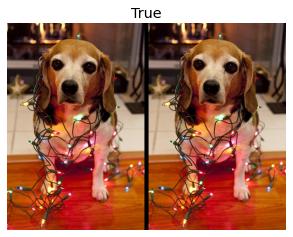

In [33]:
#@ CREATING SIAMESE IMAGE OBJECT: SUBCLASSES TUPLE: 
class SiameseImage(fastuple):                             # Defining Class. 
    def show(self, ctx=None, **kwargs):                   # Defining Function. 
        img1, img2, same_breed = self                     # Initialization. 
        if not isinstance(img1, Tensor):
            if img2.size != img1.size:                    # Inspecting Size. 
                img2 = img2.resize(img1.size)             # Resizing. 
            t1, t2 = tensor(img1), tensor(img2)           # Converting into Tensors. 
            t1, t2 = t1.permute(2,0,1),t2.permute(2,0,1)  # Changing Dimensions. 
        else: t1, t2 = img1, img2 
        line = t1.new_zeros(t1.shape[0], t1.shape[1], 10)
        return show_image(torch.cat([t1,line,t2],dim=2), 
                          title=same_breed, ctx=ctx)      # Inspection. 

#@ IMPLEMENTATION OF SIAMESE IMAGE OBJECT: 
img = PILImage.create(files[0])                           # Getting an Image. 
s = SiameseImage(img, img, True)                          # Initializing Object. 
s.show();                                                 # Inspecting Image. 

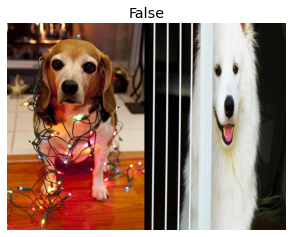

In [34]:
#@ IMPLEMENTATION OF SIAMESE IMAGE OBJECT: DIFFERENT:
img1 = PILImage.create(files[1])                          # Getting an Image. 
s1 = SiameseImage(img, img1, False)                       # Initializing Object. 
s1.show();                                                # Inspecting Image. 

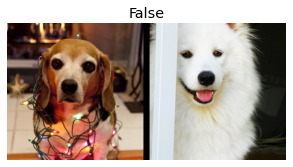

In [35]:
#@ IMPLEMENTATION OF TRANSFORMS IN SIAMESE: 
s2 = Resize(224)(s1)                                      # Resizing Image. 
s2.show();                                                # Inspecting Image. 

In [36]:
#@ FUNCTION FOR DETERMINING CLASSES: 
def label_func(fname):                                              # Defining Function. 
    return re.match(r"^(.*)_\d+.jpg$", fname.name).groups()[0] 

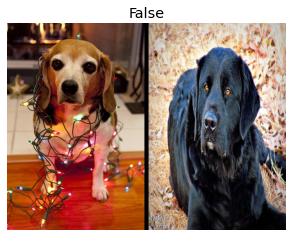

In [37]:
#@ IMPLEMENTATION OF SIAMESE TRANSFORM OBJECT: 
class SiameseTransform(Transform):                                  # Defining Class. 
    def __init__(self, files, label_func, splits):                  # Constructor Function. 
        self.labels = files.map(label_func).unique()                # Getting Labels. 
        self.lbl2files = {l:L(f for f in files if label_func(f)==l)
                          for l in self.labels}
        self.label_func = label_func                                # Initializing Labels. 
        self.valid = {f: self._draw(f) for f in files[splits[1]]}
    
    def encodes(self, f):                                           # Defining Function. 
        f2, t = self.valid.get(f, self._draw(f))
        img1, img2 = PILImage.create(f), PILImage.create(f2)        # Creating PIL Images. 
        return SiameseImage(img1, img2, t)                          # Implementation of Siamese Image. 

    def _draw(self, f):                                             # Defining Function. 
        same = random.random() < 0.5                   
        cls = self.label_func(f)                                    # Getting Labels. 
        if not same:
            cls=random.choice(L(l for l in self.labels if l!=cls))
        return random.choice(self.lbl2files[cls]), same

#@ IMPLEMENTATION OF SIAMESE TRANSFORM CLASS: 
splits = RandomSplitter()(files)                                    # Initializing Random Splitting. 
tfm = SiameseTransform(files, label_func, splits)                   # Initializing Siamese Transform. 
tfm(files[0]).show();                                               # Inspection. 

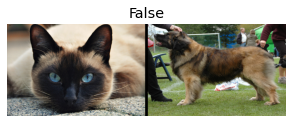

In [40]:
#@ IMPLEMENTATION OF TRANSFORMED COLLECTIONS: 
tls = TfmdLists(files, tfm, splits=splits)                          # Initializing Transformed Lists. 
show_at(tls.valid, 0);                                              # Inspection. 

In [42]:
#@ CREATING DATALOADERS: 
dls = tls.dataloaders(after_item=[Resize(224), ToTensor],                       # Resizing and Creating Tensors. 
                      after_batch=[IntToFloatTensor, 
                                   Normalize.from_stats(*imagenet_stats)])      # Normalizing the Batches. 

**Note:**
- **ToTensor** converts images to tensors. 
- **IntToFloatTensor** converts the tensor of images containing the integers from 0 to 255 to a tensor of floats and divide by 255 to make values between 0 and 1. 